<a href="https://colab.research.google.com/github/Ashwinkpv/DSA-assignment/blob/main/diabetes_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [ ]:
df

In [ ]:
df.corr()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler(feature_range=(0,1))
x=min.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
pred1=model1.predict(xtest)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier()
model2.fit(xtrain,ytrain)
pred2=model2.predict(xtest)
pred2

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model3=GradientBoostingClassifier()
model3.fit(xtrain,ytrain)
pred3=model3.predict(xtest)
pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [ ]:
acc1=accuracy_score(ytest,pred1)
acc1

0.778125

In [ ]:
acc2=accuracy_score(ytest,pred2)
acc2

0.77875

In [ ]:
acc3=accuracy_score(ytest,pred3)
acc3

0.83

In [ ]:
f1_score(ytest,pred1)

0.5997745208568207

In [ ]:
f1_score(ytest,pred2)

0.6672932330827068

In [ ]:
f1_score(ytest,pred3)

0.7424242424242424

In [ ]:
confusion_matrix(ytest,pred1)

array([[979,  80],
       [275, 266]])

In [ ]:
confusion_matrix(ytest,pred2)

array([[891, 168],
       [186, 355]])

In [ ]:
confusion_matrix(ytest,pred3)

array([[936, 123],
       [149, 392]])

In [ ]:
predp1 = model1.predict_proba(xtest)
predp2 = model2.predict_proba(xtest)
predp3 = model3.predict_proba(xtest)
predp3

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,thre = roc_curve(ytest,predp1[:,1],pos_label=1)
fpr1,tpr1,thre1 = roc_curve(ytest,predp2[:,1],pos_label=1)
fpr2,tpr2,thre2 = roc_curve(ytest,predp3[:,1],pos_label=1)

NameError: ignored

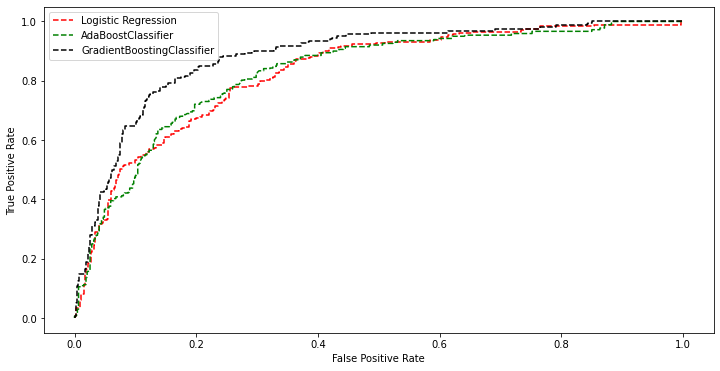

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(fpr,tpr,"r--",Label="Logistic Regression")
plt.plot(fpr1,tpr1,"g--",Label="AdaBoostClassifier")
plt.plot(fpr2,tpr2,"k--",Label="GradientBoostingClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [ ]:
roc_auc_score(ytest,predp1,multi_class='ovr')

In [ ]:
Algorithms=['LogisticRegression','AdaBoostClassifier','GradientBoostClassifire']
accuracy=[acc1,acc2,acc3]
accuracy

[0.778125, 0.77875, 0.83]

In [ ]:
import pandas as pd
performence=pd.DataFrame()
performence['Algorithms']=Algorithms
performence['accuracy']=accuracy
performence

,Algorithms,accuracy
0,LogisticRegression,0.778125
1,AdaBoostClassifier,0.778750
2,GradientBoostClassifire,0.830000


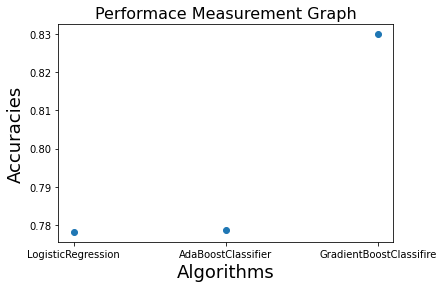

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(performence['Algorithms'],performence['accuracy'])
plt.xlabel("Algorithms",fontsize=18)
plt.ylabel('Accuracies',fontsize=18)
plt.title("Performace Measurement Graph",fontsize=16)
plt.show()

In [ ]:
#GredientBoostClassifier model is best